In [20]:
from __future__ import print_function

import os
import sys

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls /gws/open/Student/citibike

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [3]:
citi_bike_df =pd.read_csv('/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip', compression='zip')

In [4]:
citi_bike_df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2


In [5]:
citi_bike_df['dayofweek']=pd.to_datetime(citi_bike_df['starttime']).dt.dayofweek

## Null hypothesis: Citi Bike usage is same or more for weekdays than weekends

## Alternative hypothesis: Citi Bike usage is more on weekends

In [6]:
citi_bike_df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'dayofweek'],
      dtype='object')

In [7]:
citi_bike_df.drop(['starttime','stoptime','start station id','start station name',
                   'start station latitude','start station longitude','end station id',
                   'end station name','end station latitude','end station longitude',
                  'bikeid','birth year','gender','usertype'],axis=1,inplace=True)

In [8]:
citi_bike_df.head(3)

,tripduration,dayofweek
0,364,5
1,2142,5
2,328,5


### Plot of Data Distribution

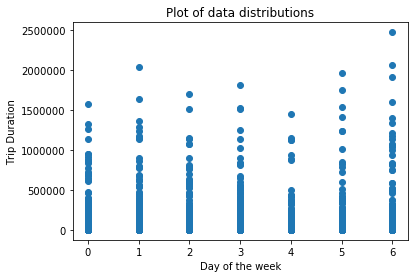

In [39]:
pl.plot(citi_bike_df['dayofweek'],citi_bike_df['tripduration'],'o')
pl.title("Plot of data distributions")
pl.xlabel('Day of the week')
pl.ylabel('Trip Duration')

### Let the significance threshold be 2 sigma

In [14]:
tripduaration_weekday_mean = citi_bike_df[citi_bike_df['dayofweek'] < 5]['tripduration'].mean()

In [16]:
tripduaration_weekend_mean = citi_bike_df[citi_bike_df['dayofweek'] >= 5]['tripduration'].mean()

In [17]:
tripduaration_weekend_mean

1213.0268010458944

### Using z-test to test the hypothesis

In [29]:
sigma = citi_bike_df['tripduration'].std()
N = np.sqrt(len(citi_bike_df[citi_bike_df['dayofweek'] >= 5]['tripduration']))

In [30]:
z = (tripduaration_weekend_mean - tripduaration_weekday_mean)/(sigma / N)

In [31]:
z

16.139631905041576

### since 16.13 > 2, much more than 2 sigmas away from the mean, null hypothesis can be rejected!!